In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [81]:
df=pd.read_csv('Heart (3).csv')

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [83]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [84]:
A=df[df['target']==1]

In [85]:
B=df[df['target']==0]

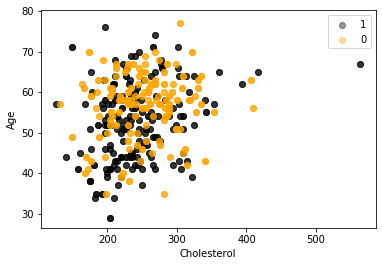

In [86]:
#Visualization, Scatter Plot

plt.scatter(A.chol,A.age,color = "Black",label="1",alpha=0.4)
plt.scatter(B.chol,B.age,color = "Orange",label="0",alpha=0.4)
plt.xlabel("Cholesterol")
plt.ylabel("Age")
plt.legend()
plt.show()

#We appear that it is clear segregation.

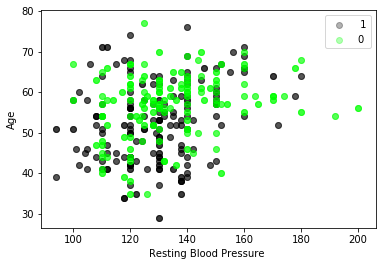

In [87]:
#Visualization, Scatter Plot

plt.scatter(A.trestbps,A.age,color = "Black",label=" 1",alpha=0.3)
plt.scatter(B.trestbps,B.age,color = "Lime",label="0",alpha=0.3)
plt.xlabel("Resting Blood Pressure ")
plt.ylabel("Age")
plt.legend()
plt.show()

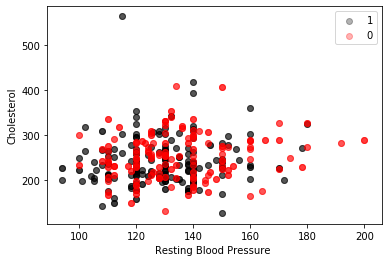

In [88]:
#Visualization, Scatter Plot

plt.scatter(A.trestbps,A.chol,color = "Black",label="1",alpha=0.3)
plt.scatter(B.trestbps,B.chol,color = "red",label="0",alpha=0.3)
plt.xlabel("Resting Blood Pressure ")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()

In [89]:
y=df['target'].values
x1=df.drop('target',axis=1)

In [90]:
#Normalization 
x = (x1 - np.min(x1))/(np.max(x1)-np.min(x1)).values

In [97]:
#Split For Train and Test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [98]:
#SVM with Sklearn

from sklearn.svm import SVC

SVM = SVC(random_state=42)
start=time.time()
SVM.fit(xtrain,ytrain)  #learning 
end=time.time()
run_time=(end-start)*1000
#SVM Test 
print ("SVM Accuracy:", SVM.score(xtest,ytest))

SVMscore = SVM.score(xtest,ytest)

SVM Accuracy: 0.8051948051948052


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
l=confusion_matrix(SVM.predict(xtest),ytest)

In [101]:
precision=(l[1][1]/(l[1][1] + l[0][1]))
recall=(l[1][1]/(l[1][0] + l[1][1]))
accuracy=((l[0][0]+l[1][1])/(l[0][0]+l[0][1]+l[1][0]+l[1][1]))
f1_score=2*((precision*recall)/(precision+recall))

In [102]:
print("Accuracy :",accuracy)
print('\n')
print("Precision :",precision)
print('\n')
print("Recall :",recall)
print('\n')
print("F1score :",f1_score)

print('\n')

print('Running time :',run_time)

Accuracy : 0.8051948051948052


Precision : 0.9194630872483222


Recall : 0.7405405405405405


F1score : 0.8203592814371257


Running time : 19.8211669921875


In [ ]:
#Code after optimization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
y=df['target'].values
X=df.drop('target',axis=1)

In [ ]:
X=StandardScaler().fit_transform(X)

In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model_predict=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score

In [ ]:
print(classification_report(y_test,model_predict))
print('\n')
print(confusion_matrix(y_test,model_predict))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [ ]:
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions=grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))
print('\n')
print(confusion_matrix(y_test,grid_predictions))
l=confusion_matrix(y_test,grid_predictions)

In [ ]:
precision=(l[1][1]/(l[1][1] + l[0][1]))
recall=(l[1][1]/(l[1][0] + l[1][1]))
accuracy=((l[0][0]+l[1][1])/(l[0][0]+l[0][1]+l[1][0]+l[1][1]))
f1_score=2*((precision*recall)/(precision+recall))

In [ ]:
print("Accuracy :",accuracy)
print('\n')
print("Precision :",precision)
print('\n')
print("Recall :",recall)
print('\n')
print("F1score :",f1_score)

print('\n')
